In [66]:
# matplotlib plots config

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.io
plotly.io.templates.default = 'seaborn'

%config InlineBackend.figure_format = 'svg'

import pylab
params = {'legend.fontsize': 9,
            'axes.labelsize': 12, 
            'axes.titlesize': 12, 

         }
plt.rcParams.update(params)

In [135]:
# tools

def get_axes(height=8, nplots=1, small=False, wratios=None, return_fig=False):
    figsize = (10, height/2)
    if nplots==1:
        if small:
            figsize = (7, height/2)
    gridspec_kw = None
    if wratios is not None:
        assert len(wratios) == nplots, 'Width ratios must be the same length as the number of subplots'
        gridspec_kw = {'width_ratios': list(wratios)}

    fig, axes = plt.subplots(1, nplots, figsize=figsize, gridspec_kw=gridspec_kw)
    if return_fig:
        return fig, axes
    else:
        return axes


def set_ax_layout(ax, title=None, xlabel=None, ylabel=None, legend=True, legend_outside=True):
    if title is not None:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if legend:
        if legend_outside:
            ax.legend(bbox_to_anchor=(1,1), loc='upper left')
        else:
            ax.legend()
    plt.tight_layout()

    
def set_pd_backend(backend='matplotlib'):
    pd.options.plotting.backend = backend


def set_plotly_layout(fig, height=8, title=None, xlabel=None, ylabel=None, legend=True, small=False, is_svg=False, 
legend_label_map=None):
    fig.update_layout(xaxis_title_font_size=16, 
    yaxis_title_font_size=16, 
    yaxis_tickfont_size=14, 
    xaxis_tickfont_size=14,  
    title_font_size=18, 
    legend_font_size=13, 
    legend_title_font_size=13)
    fig.update_layout(title=title, xaxis_title_text=xlabel, yaxis_title_text=ylabel, showlegend=legend)
    width = 900 if not small else 100*7
    height = int(100*height/2)
    if legend_label_map is not None:
        assert isinstance(legend_label_map, dict), 'Legend label map must be a dict'
        for fd in fig.data:
            if fd['name'] in legend_label_map:
                fd['name'] = legend_label_map[fd['name']]
    if not is_svg:
        fig.update_layout(width=width, height=height)
        fig.show()
    else:
        fig.show(width=width, height=height, renderer='svg')


Tests

In [8]:
import pandas as pd
import numpy as np


In [88]:
df = pd.DataFrame(np.random.randn(200, 5))

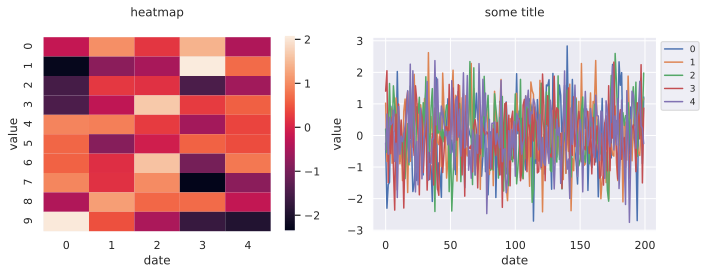

In [137]:
set_pd_backend()
ax1, ax2 = get_axes(nplots=2)
sns.heatmap(df.iloc[:10, :], ax=ax1)
df.plot(ax=ax2)
set_ax_layout(ax1, 'heatmap', 'date', 'value', legend=False)
set_ax_layout(ax2, 'some title', 'date', 'value')


In [127]:
import plotly.express as px
set_pd_backend()

In [124]:
pd.options.plotting.backend = "plotly"

fig = df.plot()
set_plotly_layout(fig, title='this plot has a title', xlabel='time')

In [70]:
fig.layout

Layout({
    'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
    'margin': {'t': 60},
    'template': '...',
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}
})